In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lgr
from sklearn import metrics
from sklearn.decomposition import PCA

In [9]:
# Load data and preview
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
# Select data
x = df.iloc[:,0:13].values
y = df.iloc[:,13].values

# Scaling
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

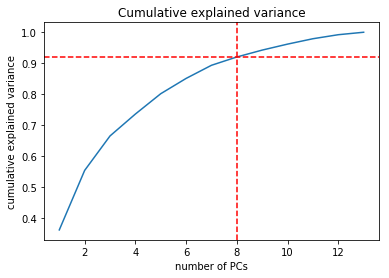

Number of PCs needed to explain 90% var. is 8


In [57]:
# PCA
pca = PCA(n_components=None)
x_pca = pca.fit_transform(x)
var_exp = pca.explained_variance_ratio_
var_exp_cum = np.cumsum(var_exp)

# Find and plot the number of PCs that explain >90% var.
var_90pct_point = np.where(var_exp_cum > 0.9)[0][0]

plt.plot(np.arange(1,14), var_exp_cum)
plt.xlabel('number of PCs')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative explained variance')
plt.axvline(var_90pct_point+1, color='r', linestyle='--')
plt.axhline(var_exp_cum[var_90pct_point], color='r', linestyle='--')
plt.show()

print('Number of PCs needed to explain 90% var. is', var_90pct_point+1)

In [43]:
# Select data in the PC space
x_pcs = x_pca[:,0:var_90pct_point+1]

# Split training and test
x_train, x_test, y_train, y_test = train_test_split(x_pcs,y,test_size=0.25)

In [51]:
# Log regression
log_reg = lgr(solver='lbfgs', multi_class="auto")
log_reg.fit(x_train, y_train)

# Make predictions on test data
p_pred = log_reg.predict_proba(x_test) # predicted p for each class
y_pred = log_reg.predict(x_test) # predicted outcome

In [52]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Accuracy of the model:", round(metrics.accuracy_score(y_test,y_pred)*100),"%")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.94      1.00      0.97        16
           3       1.00      0.93      0.96        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of the model: 98.0 %
